# *VII Findind Contours*

Les *Contours* d'un objet sont représentés par une suite de points fermés.

Une fois identifié, ces contours fermés pourront par exemple:  
- être classés selon leurs formes
- compter le nombre d'objet
- mesuré la taille des objets

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from helpers import show_image

In [3]:
img_panneau = plt.imread('data/panneau_droit.png')

Pour déterminer les contours d'objets dans une image,  
elle doit d'abord être transformé en image *Binaire* grace au *Thresholding* (seuillage)  
Une fois les objets isolé en blanc sur fond noir, nous pourront détecter leurs contours

Les étapes de *pré-traitements* pour détecter les contours:
- *`color.rgb2gray()`* Transformer l'image en *2D Grayscale*, pour obtenir la valeur de seuillage optimale
- *`threshold_otsu()`* Faire passer un *Seuillage* (thresholding) dessus, pour la rendre *Binaire*
- *`find_contours()`* va trouver les *Contours(ou Joint)* de nos objets


*`find_contours()`* va trouver les *Contours(ou Joint)* de nos objets qui correspondent à des pixels d'une valeur données d'égales luminosités dans notre *array 2D*

In [6]:
from skimage.color import rgb2gray

In [8]:
gray_panneau = rgb2gray(img_panneau)

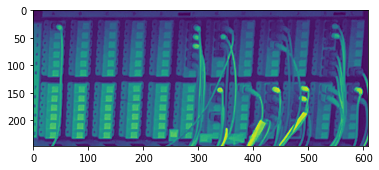

In [10]:
plt.imshow(gray_panneau)

In [15]:
from skimage.filters import threshold_otsu
from skimage.filters import threshold_minimum

In [16]:
thresh = threshold_otsu(gray_panneau)
thresh_mini = threshold_minimum(gray_panneau)

In [13]:
thresholded_panneau = gray_panneau > thresh

In [21]:
mini_thresh_panneau = gray_panneau > thresh_mini

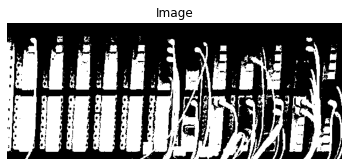

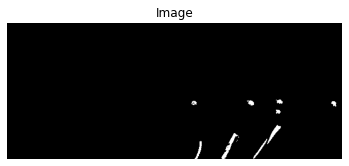

In [22]:
show_image(thresholded_panneau)
show_image(mini_thresh_panneau)

In [25]:
from skimage import exposure

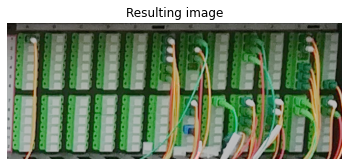

In [27]:
eq_panneau =  exposure.equalize_hist(img_panneau)

# Show the resulting image
show_image(image_eq, 'Resulting image')

In [29]:
eq_gray_panneau = rgb2gray(eq_panneau)

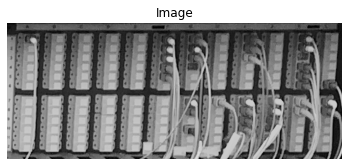

In [30]:
show_image(eq_gray_panneau)

In [23]:
from skimage.filters import try_all_threshold


skimage.filters.thresholding.threshold_isodata
skimage.filters.thresholding.threshold_li
skimage.filters.thresholding.threshold_mean
skimage.filters.thresholding.threshold_minimum
skimage.filters.thresholding.threshold_otsu
skimage.filters.thresholding.threshold_triangle
skimage.filters.thresholding.threshold_yen


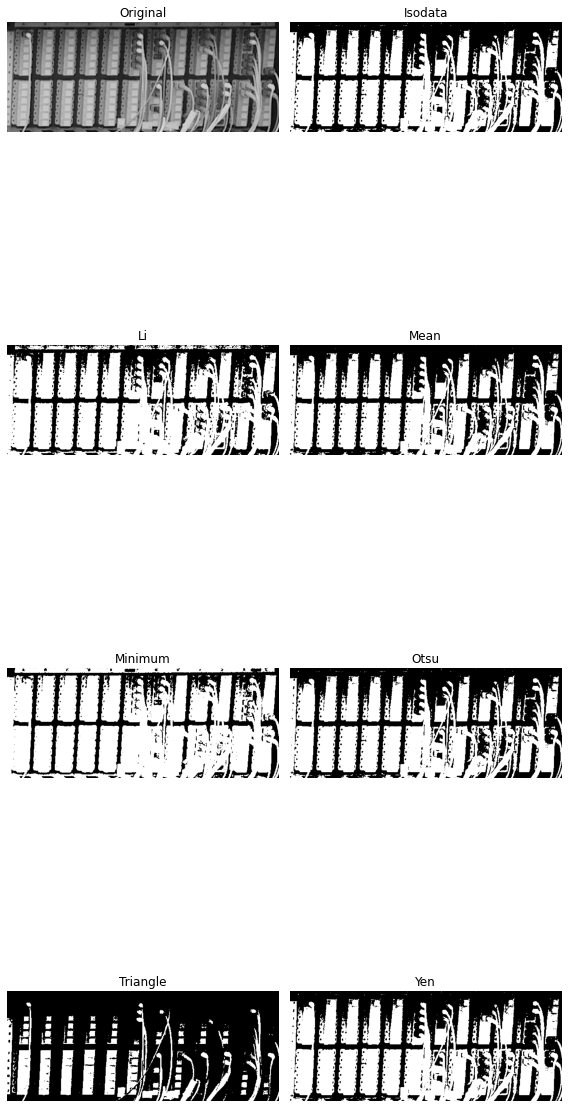

In [32]:
fig, ax = try_all_threshold(eq_gray_panneau, verbose=True, figsize=(8, 20))

# Show the resulting plots
plt.show(fig, ax)

In [41]:
from skimage.filters import threshold_triangle


In [42]:
triangle_thresh_panneau = threshold_triangle(eq_gray_panneau)

In [43]:
triangle_thresholded_panneau = gray_panneau > triangle_thresh_panneau

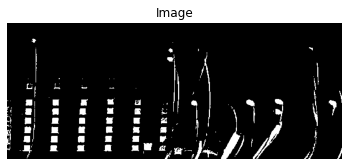

In [44]:
show_image(triangle_thresholded_panneau)

*`find_contours()`* On lui passe en paramètre:
- L'image binaire prétraitré
    - `Constant level value`, une valeur de niveau constante qui varie entre 0 et 1, plus sa valeur est proche de 1, plus la l'algo sera sensible et detectera des contours plus précis et complexes.

elle retourne une liste avec tous les coutours des Objets de l'images, avec les coordonnées du long des contours

In [45]:
from skimage import measure 

In [71]:
contours_triangle_panneau = measure.find_contours(triangle_thresholded_panneau, 0.5)

In [66]:
for c in contours_triangle_panneau:
    print(c.shape)

(37, 2)
(5, 2)
(27, 2)
(5, 2)
(33, 2)
(135, 2)
(15, 2)
(5, 2)
(9, 2)
(9, 2)
(303, 2)
(5, 2)
(11, 2)
(43, 2)
(5, 2)
(201, 2)
(89, 2)
(33, 2)
(5, 2)
(5, 2)
(13, 2)
(151, 2)
(5, 2)
(11, 2)
(5, 2)
(9, 2)
(53, 2)
(5, 2)
(5, 2)
(5, 2)
(5, 2)
(5, 2)
(55, 2)
(5, 2)
(13, 2)
(5, 2)
(5, 2)
(7, 2)
(5, 2)
(49, 2)
(37, 2)
(5, 2)
(31, 2)
(25, 2)
(5, 2)
(87, 2)
(41, 2)
(13, 2)
(5, 2)
(5, 2)
(5, 2)
(5, 2)
(55, 2)
(49, 2)
(53, 2)
(51, 2)
(49, 2)
(67, 2)
(57, 2)
(7, 2)
(7, 2)
(49, 2)
(93, 2)
(5, 2)
(23, 2)
(9, 2)
(11, 2)
(119, 2)
(5, 2)
(5, 2)
(398, 2)
(5, 2)
(15, 2)
(5, 2)
(73, 2)
(7, 2)
(7, 2)
(49, 2)
(11, 2)
(53, 2)
(5, 2)
(51, 2)
(53, 2)
(51, 2)
(47, 2)
(11, 2)
(33, 2)
(7, 2)
(15, 2)
(5, 2)
(258, 2)
(7, 2)
(7, 2)
(5, 2)
(7, 2)
(6, 2)
(35, 2)
(5, 2)
(5, 2)
(5, 2)
(5, 2)
(7, 2)
(5, 2)
(7, 2)
(10, 2)
(5, 2)
(33, 2)
(55, 2)
(57, 2)
(19, 2)
(53, 2)
(45, 2)
(51, 2)
(65, 2)
(17, 2)
(81, 2)
(12, 2)
(5, 2)
(65, 2)
(5, 2)
(9, 2)
(12, 2)
(9, 2)
(5, 2)
(53, 2)
(59, 2)
(53, 2)
(51, 2)
(57, 2)
(15, 2)
(5, 2)
(5, 2

On voit ici que chaque *Contours* est un ndarrayde forme `(n, 2)`, composé de `n` coordonnées de ligne, et colonne le long du contour

In [75]:
show_image(image_eq, contours_triangle_panneau)
#show_image(triangle_thresholded_panneau, contours_triangle_panneau)

ValueError: Image size of 349x98176 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 432x288 with 1 Axes>

fonction a mettre dans Snips, display contours

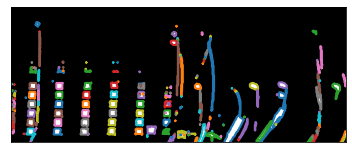

In [77]:
fig, ax = plt.subplots()
#image de base
ax.imshow(triangle_thresholded_panneau, cmap=plt.cm.gray)

# coordonnées de contours trouvé
for n, contour in enumerate(contours_triangle_panneau):
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.show()

## Compter les Bouchons dans l'image

In [78]:
# Create list with the shape of each contour
shape_contours = [cnt.shape[0] for cnt in contours_triangle_panneau]

In [115]:
# Set 50 as the maximum size of the dots shape
max_dots_shape = 58

min_dot_shape = 40# a expérienter

# Count dots in contours excluding bigger than dots size
dots_contours = [cnt for cnt in contours_triangle_panneau if np.shape(cnt)[0] < max_dots_shape ]

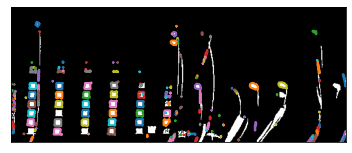

In [116]:
fig, ax = plt.subplots()
#image de base
ax.imshow(triangle_thresholded_panneau, cmap=plt.cm.gray)

# coordonnées de contours trouvé
for n, contour in enumerate(dots_contours):
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.show()

In [98]:
print("Nombre de bouchons détectés: {}. ".format(len(dots_contours)))

Nombre de bouchons détectés: 177. 
